In [2]:
%run '/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/classification/log_regression.ipynb'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3A    51481
2A    10576
2B    10096
1B       16
1A       16
Name: QScore, dtype: int64


country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64


country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64


3A    51473
2A      224
1A       16
Name: QScore, dtype: int64


In [3]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, normalized_train, y_balanced, cv=5, scoring='f1_macro')
scores

array([0.50179585, 0.46258785, 0.44317065, 0.45180476, 0.52505869])

k-Fold Crosss Validation

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
kf = KFold(n_splits=5)
kf.split(normalized_train)
f1_scores = []

def _run_():
  for train_index, test_index in kf.split(normalized_train):
    x_train, x_test = [normalized_train.iloc[train_index], 
                        normalized_train.iloc[test_index]]
    y_train, y_test = [y_balanced.iloc[train_index], 
                        y_balanced.iloc[test_index]]
    model = LogisticRegression().fit(x_train, y_train)
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A')*100)
  return f1_scores

_run_()

[61.42857142857142,
 57.971014492753625,
 55.47445255474452,
 54.41176470588236,
 0.0]

Stratified K-Fold Cross Validation

In [5]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores = []

def _run_():
  for train_index, test_index in skf.split(normalized_train, y_balanced):
    x_train, x_test = np.array(normalized_train)[train_index], np.array(normalized_train)[test_index]
    y_train, y_test = np.array(y_balanced)[train_index], np.array(y_balanced)[test_index]
    model = LogisticRegression().fit(x_train, y_train)
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A'))
  return f1_scores

_run_()

[0.6666666666666667,
 0.6218487394957984,
 0.5535714285714285,
 0.6071428571428572,
 0.574074074074074]

Leave One Out Cross Validation (LOOCV)

In [6]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
score = cross_val_score(LogisticRegression(), normalized_train, y_balanced, 
                        cv=loo, scoring='f1_macro')
average_score = score.mean() * 100
average_score

34.53815261044177

Confusion Matrix

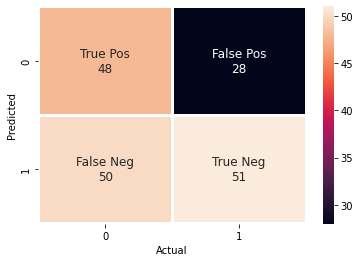

In [18]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

new_pred = log_reg.predict(normalized_test)
cn_matrix = confusion_matrix(y_test, new_pred, labels=['2A', '3A'])
names = ['True Pos','False Pos','False Neg','True Neg']
counts = [int('{0:0.0f}'.format(value)) for value in cn_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt='', linewidths=2, annot_kws={"size": 12})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Accuracy

![\Large accuracy=\frac{TP\+TN}{TP\+TN\+FP\+FN}](https://latex.codecogs.com/svg.latex?\Large&space;accuracy=\frac{TP\+TN}{TP\+TN\+FP\+FN})

In [19]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_pred)
print("accuracy: {}".format(round(accuracy * 100), 2))

accuracy: 56


Precision

In [20]:
precision = precision_score(y_true=y_test, y_pred=new_pred, pos_label='2A')
print("precision: {}".format(round(precision * 100), 2))

precision: 49


Recall

In [24]:
recall = recall_score(y_true=y_test, y_pred=new_pred, pos_label='2A')
print("recall: {}".format(round(recall * 100), 2))

recall: 63


There is a trade-off between Recall and Precision. It is impossible to maximise both metrics simultaneously because an increase in recall decreases precision

In [25]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier().fit(normalized_train, y_balanced)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')